In [1]:
import pandas as pd

data = pd.read_csv('Annotated_data.csv')

#print the size of the data
print(data.shape)
data.head()

(2530, 5)


,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def train_test_model(vectorizer, model, data, xString='Patient Question', yString='Dominant Distortion'):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data[xString], data[yString], test_size=0.2, random_state=42)

    # Preprocess the text data and vectorize using the provided vectorizer
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict the labels for the testing data
    y_pred = model.predict(X_test_vectorized)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"F1-score: {f1}")
    return f1, y_pred, y_test

F1-score: 0.729266082125294
               precision    recall  f1-score   support

    Distorted       0.78      0.82      0.80       331
No Distortion       0.63      0.56      0.59       175

     accuracy                           0.73       506
    macro avg       0.70      0.69      0.70       506
 weighted avg       0.73      0.73      0.73       506



c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


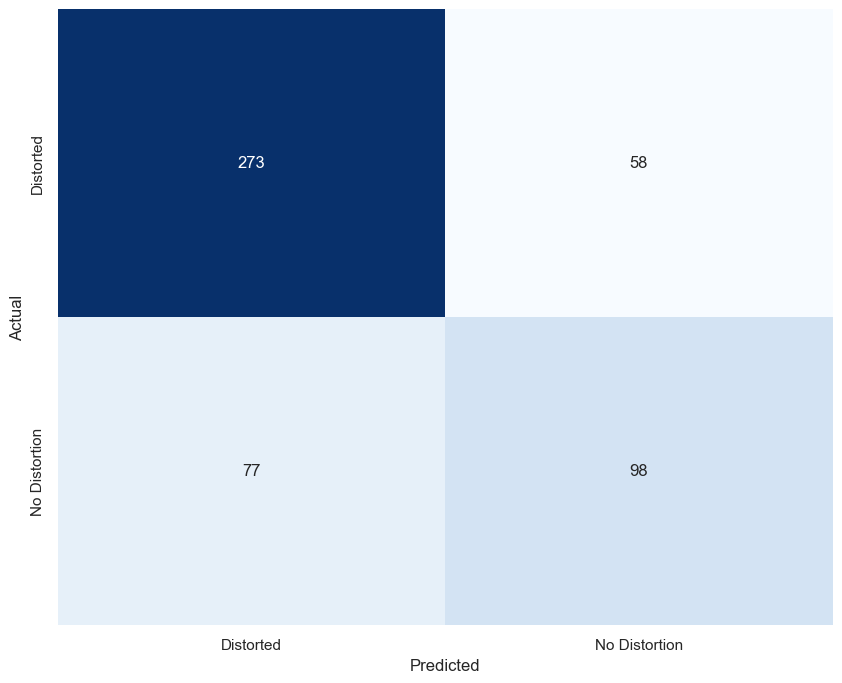

In [3]:
# test the model using TfIdfVectorizer and LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

discreteData = data[['Id_Number', 'Patient Question', 'Dominant Distortion']].copy()
discreteData.loc[discreteData['Dominant Distortion'] != 'No Distortion', 'Dominant Distortion'] = 'Distorted'

vectorizer = TfidfVectorizer()
model = LinearSVC()

(f1, y_pred, y_test) = train_test_model(vectorizer, model, discreteData)

# print the classification report
print(classification_report(y_test, y_pred))

# create a confusion matrix to see how the model performed
sns.set()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Distorted', 'No Distortion'], yticklabels=['Distorted', 'No Distortion'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


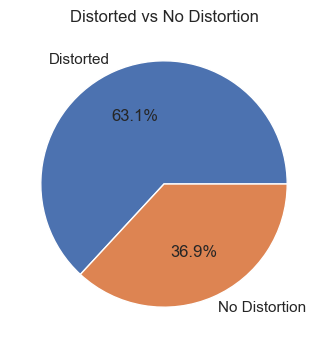

Distorted        1597
No Distortion     933
Name: Dominant Distortion, dtype: int64

In [4]:
discreteData['Dominant Distortion'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.title('Distorted vs No Distortion')
plt.ylabel('')
plt.show()
discreteData['Dominant Distortion'].value_counts()


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#,'Multi-Layer Perceptron': MLPClassifier()
# Not using MLPClassifier because it takes too long to train

# Define the vectorizer algorithms
vectorizers = {
    'CountVectorizer': CountVectorizer(),
    'TfidfVectorizer': TfidfVectorizer(),
    'HashingVectorizer': HashingVectorizer()
}

# Define the classification models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'Linear SVM': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(discreteData['Patient Question'], discreteData['Dominant Distortion'], test_size=0.2, random_state=42)

f1_scores = {}

# Train and evaluate each model with each vectorizer
for vectorizer_name, vectorizer in vectorizers.items():
    print(f"Vectorizier: {vectorizer_name}")
    # Preprocess the text data and vectorize using the current vectorizer
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for model_name, model in models.items():
        print(f"{model_name}: ", end='')
        # Try to train the model, if it fails, skip to the next model
        try:
            # Train the model on the training data
            model.fit(X_train_vectorized, y_train)

            # Predict the labels for the testing data
            y_pred = model.predict(X_test_vectorized)

            # Print the f1 score
            print(f"{f1_score(y_test, y_pred, average='weighted')}")
            f1_scores[(vectorizer_name, model_name)] = f1_score(y_test, y_pred, average='weighted')
        except:
            print("Failed")
            continue


Vectorizier: CountVectorizer
Multinomial Naive Bayes: 0.7047135316737961
Bernoulli Naive Bayes: 0.6934228517977626
Logistic Regression: 

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7050564159307722
SGD Classifier: 0.6828345412705024
Support Vector Machine: 0.7221896077729301
Linear SVM: 

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.6918291420317506
Decision Tree: 0.6202783777723744
Random Forest: 0.7045582277346562
AdaBoost: 0.700646872846794
Gradient Boosting: 0.7301841514341407
K-Nearest Neighbors: 0.6510730985776422
Vectorizier: TfidfVectorizer
Multinomial Naive Bayes: 0.5173804430466421
Bernoulli Naive Bayes: 0.6934228517977626
Logistic Regression: 0.7230841320993521
SGD Classifier: 0.7014035357225894
Support Vector Machine: 0.7302472126858341
Linear SVM: 0.729266082125294
Decision Tree: 

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.6175022536578599
Random Forest: 0.6899094507453815
AdaBoost: 0.7029120986716503
Gradient Boosting: 0.7305554709905326
K-Nearest Neighbors: 0.6068457284959008
Vectorizier: HashingVectorizer
Multinomial Naive Bayes: Failed
Bernoulli Naive Bayes: 0.5173804430466421
Logistic Regression: 0.7127088573481855
SGD Classifier: 0.7384059103083984
Support Vector Machine: 0.7273809363298599
Linear SVM: 0.738598591259472
Decision Tree: 

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.6407930590489878
Random Forest: 0.6748149528053647
AdaBoost: 0.6893260914470801
Gradient Boosting: 0.7180929409360648
K-Nearest Neighbors: 0.604621754043981


Classification Report for HashingVectorizer + Linear SVM:
               precision    recall  f1-score   support

    Distorted       0.78      0.84      0.81       331
No Distortion       0.65      0.57      0.60       175

     accuracy                           0.74       506
    macro avg       0.72      0.70      0.71       506
 weighted avg       0.74      0.74      0.74       506



c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


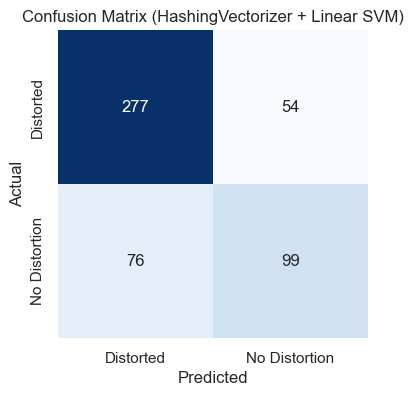

In [6]:
# Sort the f1_scores dictionary based on the F1-score in descending order
sorted_scores = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

# Get the best performing combination
best_combination = sorted_scores[0][0]
best_vectorizer_name, best_model_name = best_combination

# Get the best vectorizer and model
best_vectorizer = vectorizers[best_vectorizer_name]
best_model = models[best_model_name]

# Preprocess the text data and vectorize using the best vectorizer
X_train_vectorized = best_vectorizer.fit_transform(X_train)
X_test_vectorized = best_vectorizer.transform(X_test)

# Train the best model on the training data
best_model.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data using the best model
y_pred = best_model.predict(X_test_vectorized)

# Print the classification report for the best performing combination
print(f"Classification Report for {best_vectorizer_name} + {best_model_name}:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix for the best performing combination
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Distorted', 'No Distortion'], yticklabels=['Distorted', 'No Distortion'])
plt.title(f"Confusion Matrix ({best_vectorizer_name} + {best_model_name})")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

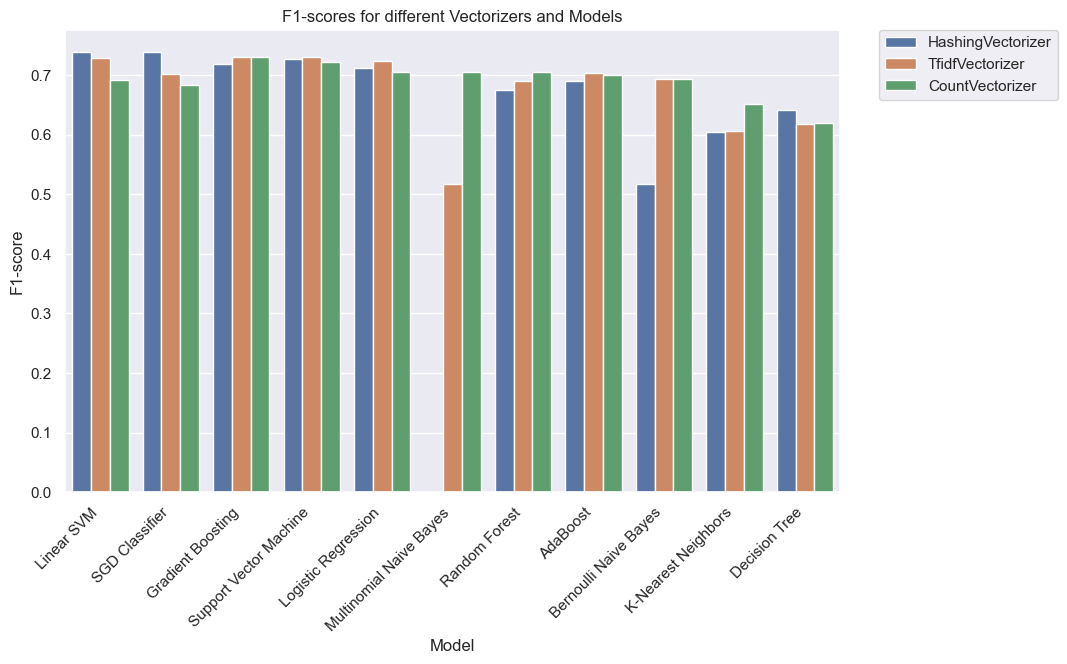

In [7]:
# Create a dataframe from the results to create a plot of the F1-scores
results = pd.DataFrame(sorted_scores, columns=['Vectorizer + Model', 'F1-score'])
results['Vectorizer'] = results['Vectorizer + Model'].apply(lambda x: x[0])
results['Model'] = results['Vectorizer + Model'].apply(lambda x: x[1])
results.drop(columns=['Vectorizer + Model'], inplace=True)

# Plot the F1-scores
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='F1-score', hue='Vectorizer', data=results)
plt.title('F1-scores for different Vectorizers and Models')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Classification Report for HashingVectorizer + LinearSVC:
               precision    recall  f1-score   support

    Distorted       0.78      0.84      0.81       331
No Distortion       0.65      0.57      0.60       175

     accuracy                           0.74       506
    macro avg       0.72      0.70      0.71       506
 weighted avg       0.74      0.74      0.74       506



c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


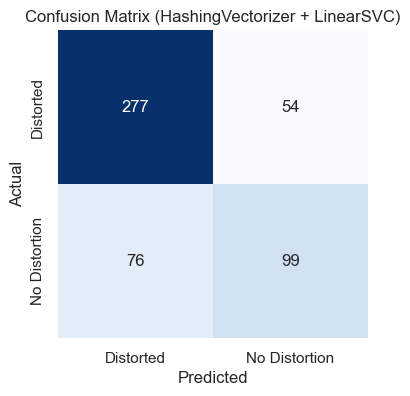

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification Report for HashingVectorizer + LinearSVC:
                         precision    recall  f1-score   support

All-or-nothing thinking       0.00      0.00      0.00        15
    Emotional Reasoning       0.22      0.17      0.19        30
        Fortune-telling       0.32      0.33      0.33        24
               Labeling       0.13      0.07      0.10        40
          Magnification       0.15      0.14      0.14        37
          Mental filter       0.13      0.23      0.17        13
           Mind Reading       0.41      0.52      0.46        54
     Overgeneralization       0.24      0.32      0.27        50
        Personalization       0.23      0.18      0.20        39
      Should statements       0.06      0.06      0.06        18

               accuracy                           0.24       320
              macro avg       0.19      0.20      0.19       320
           weighted avg       0.22      0.24      0.22       320



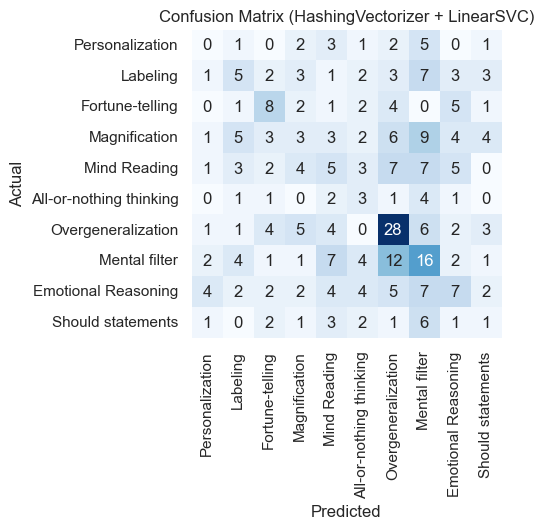

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import LinearSVC

### The codde below trains the model to separate the distorted and non-distorted questions, 
### and then uses a different model to predict the distortion of the distorted questions in the original dataset

# Store the best model and vectorizer, HashingVectorizer and LinearSVC, for later use without having to retrain
best_model_Discrete = LinearSVC()
best_vectorizer_Discrete = HashingVectorizer()

# Preprocess the text data and vectorize using the best vectorizer
X_train, X_test, y_train, y_test = train_test_split(discreteData['Patient Question'], discreteData['Dominant Distortion'], test_size=0.2, random_state=42)
X_train_vectorized = best_vectorizer_Discrete.fit_transform(X_train)
X_test_vectorized_Discrete = best_vectorizer_Discrete.transform(X_test)

# Train the best model on the training data
best_model_Discrete.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data using the best model
y_pred = best_model_Discrete.predict(X_test_vectorized_Discrete)

best_vectorizer_name = best_vectorizer_Discrete.__class__().__str__().split('(')[0]
best_model_name = best_model_Discrete.__class__().__str__().split('(')[0]

# Print the classification report for the best performing combination
print(f"Classification Report for {best_vectorizer_name} + {best_model_name}:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix for the best performing combination
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Distorted', 'No Distortion'], yticklabels=['Distorted', 'No Distortion'])
plt.title(f"Confusion Matrix ({best_vectorizer_name} + {best_model_name})")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Create a new dataframe with only the distorted questions
distortedData = data[data['Dominant Distortion'] != 'No Distortion'].copy()

# Best model is the same, but the best vectorizer is tdidf for determining the distortion of the distorted questions
# You can see these results in baseline.ipynb
best_model_Distortions = LinearSVC()
best_vectorizer_Distortions = TfidfVectorizer()

# Preprocess the text data and vectorize using the best vectorizer using the same data as before, but substituting the distortion data with the actual distortion
X_train, X_test, y_train, y_test = train_test_split(distortedData['Patient Question'], distortedData['Dominant Distortion'], test_size=0.2, random_state=42)
X_train_vectorized = best_vectorizer_Distortions.fit_transform(X_train)
X_test_vectorized_Distortions = best_vectorizer_Distortions.transform(X_test)

# Train the best model on the training data
best_model_Distortions.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data using the best model
y_pred = best_model_Distortions.predict(X_test_vectorized_Distortions)

# Print the classification report for the best performing combination
print(f"Classification Report for {best_vectorizer_name} + {best_model_name}:")
print(classification_report(y_test, y_pred))

labels = distortedData['Dominant Distortion'].unique()

# Print the confusion matrix for the best performing combination
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix ({best_vectorizer_name} + {best_model_name})")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [9]:
# Test the two models together, by first using the first model to predict if a question is distorted or not,
# and then using the second model to predict the distortion of the distorted questions

# Preprocess the text data and vectorize using the best vectorizer
X_train, X_test, y_train, y_test = train_test_split(data['Patient Question'], data['Dominant Distortion'], test_size=0.2, random_state=42)
best_model_Discrete.predict


<bound method LinearClassifierMixin.predict of LinearSVC()>

In [10]:
best_model_Discrete = LinearSVC()
best_vectorizer_Discrete = HashingVectorizer()

# Preprocess the text data and vectorize using the best vectorizer
X_train, X_test, y_train, y_test = train_test_split(discreteData['Patient Question'], discreteData['Dominant Distortion'], test_size=0.2, random_state=42)
X_train_vectorized = best_vectorizer_Discrete.fit_transform(X_train)
X_test_vectorized_Discrete = best_vectorizer_Discrete.transform(X_test)

# Create a new array based off of X_train and X_test, but with the Dominant Distortions replaced with the actual distortions
X_train_distortions = X_train.copy()
X_test_distortions = X_test.copy()



if (False):
    # Train the best model on the training data
    best_model_Discrete.fit(X_train_vectorized, y_train)

    # Predict the labels for the testing data using the best model
    y_pred = best_model_Discrete.predict(X_test_vectorized_Discrete)

    best_vectorizer_name = best_vectorizer_Discrete.__class__().__str__().split('(')[0]
    best_model_name = best_model_Discrete.__class__().__str__().split('(')[0]

    # Print the classification report for the best performing combination
    print(f"Classification Report for {best_vectorizer_name} + {best_model_name}:")
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix for the best performing combination
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Distorted', 'No Distortion'], yticklabels=['Distorted', 'No Distortion'])
    plt.title(f"Confusion Matrix ({best_vectorizer_name} + {best_model_name})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    